In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib notebook

In [2]:
df_shaded = pd.read_csv('hitcrd_shaded.csv', header=None, names=['r', 'g', 'b'])
#df = pd.read_csv('hit_crd_swxy.csv', header=None, names=['r', 'g', 'b'])
#df=df.astype(float)
df_shaded=df_shaded.astype(int)

In [3]:
numPix_x=600 # width
numPix_y=400 # height

In [4]:
hit_crds_image=np.zeros((numPix_y,numPix_x,4),dtype=np.uint8)

In [5]:
red=df_shaded['r'].values
green=df_shaded['g'].values
blue=df_shaded['b'].values

In [6]:
hci_red=red.reshape(numPix_y,numPix_x)
hci_green=green.reshape(numPix_y,numPix_x)
hci_blue=blue.reshape(numPix_y,numPix_x)

In [7]:
hit_crds_image[:,:,0]=hci_red
hit_crds_image[:,:,1]=hci_green
hit_crds_image[:,:,2]=hci_blue
hit_crds_image[:,:,3]=255

In [8]:
hit_crds_image.shape

(400, 600, 4)

In [9]:
hit_crds_image[0,0,0]

255

In [10]:
img = Image.fromarray(hit_crds_image)
#img=plt.imshow(hit_crds_image)

In [11]:
img.show()

In [12]:
img_pixels=Image.open("pixels.png")

In [13]:
pixels_array=np.array(img_pixels)

In [14]:
pixels_array.shape

(400, 600, 4)

In [15]:
hit_crds_image.shape

(400, 600, 4)

In [16]:
diff_r=hit_crds_image[:,:,0]-pixels_array[:,:,0]
diff_g=hit_crds_image[:,:,1]-pixels_array[:,:,1]
diff_b=hit_crds_image[:,:,2]-pixels_array[:,:,2]

In [17]:
r_max_diff=np.amax(diff_r)
g_max_diff=np.amax(diff_g)
b_max_diff=np.amax(diff_b)

In [18]:
print(r_max_diff, g_max_diff, b_max_diff)

0 0 0


In [19]:
df = pd.read_csv('hitcrd.csv', header=None, names=['x', 'y', 'z'])

In [20]:
df_new = df.loc[~((df['x'] == 0) & (df['y'] == 0) & (df['z'] == 0))]

In [21]:
print(df_new.shape[0])

47958


In [22]:
x=df_new['x'].values
y=df_new['y'].values
z=df_new['z'].values

<IPython.core.display.Javascript object>


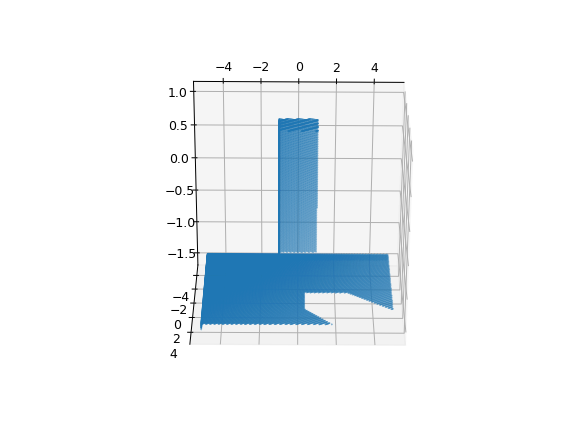

In [25]:
# Create a figure
fig = plt.figure()

# Create a 3D axis
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot
ax.scatter(x, y, z,s=0.1)

# Show the plot
plt.show()